=== REGRESIÓN LINEAL: SIMPLE Y MÚLTIPLE ===

1. ¿QUÉ ES LA REGRESIÓN LINEAL?
------------------------------

 OBJETIVO:
Predecir un valor numérico (variable dependiente) basándose en una o más 
características (variables independientes).

 CONCEPTO MATEMÁTICO:
La regresión lineal busca la "mejor línea recta" que pase por los datos.
Esta línea se describe con la ecuación: y = mx + b

Donde:
• y = variable que queremos predecir (dependiente)
• x = variable que usamos para predecir (independiente)  
• m = pendiente (cuánto cambia y cuando x cambia en 1)
• b = intercepto (valor de y cuando x = 0)

 EJEMPLO COTIDIANO:
Predecir el precio de una casa basándose en su tamaño:
• y = precio de la casa
• x = metros cuadrados
• La línea nos dice: "por cada metro cuadrado adicional, 
  el precio aumenta $X pesos"

 TIPOS:
• Simple: Una sola variable independiente (x → y)
• Múltiple: Varias variables independientes (x1, x2, x3... → y)


2. REGRESIÓN LINEAL SIMPLE - PASO A PASO
-----------------------

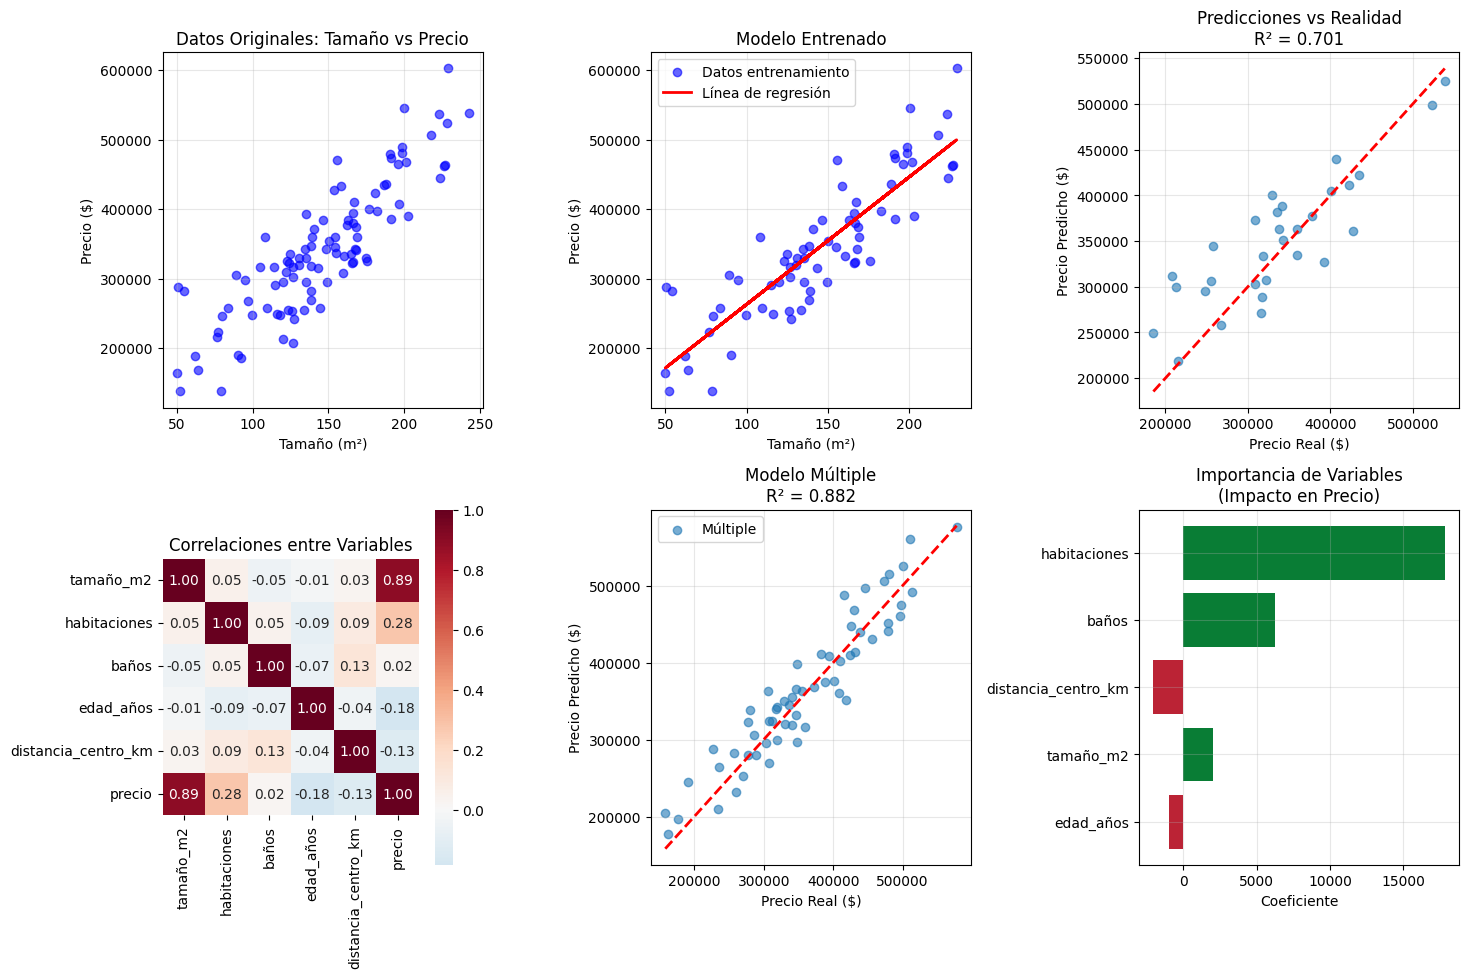


4. EJEMPLO PRÁCTICO: PREDICCIÓN DE NUEVAS CASAS
---------------------------------------------
CASAS NUEVAS PARA PREDECIR:
   tamaño_m2  habitaciones  baños  edad_años  distancia_centro_km
0        120             2      1          5                    8
1        200             4      3         15                   12
2         80             1      1         30                   25
3        300             5      4          2                    5

 PREDICCIONES DE PRECIOS:
Casa 1: $308,974
Casa 2: $497,413
Casa 3: $152,104
Casa 4: $746,925

RESULTADOS COMPLETOS:
   tamaño_m2  habitaciones  baños  edad_años  distancia_centro_km  \
0        120             2      1          5                    8   
1        200             4      3         15                   12   
2         80             1      1         30                   25   
3        300             5      4          2                    5   

   precio_predicho  
0         308974.0  
1         497413.0  
2         152104.0  

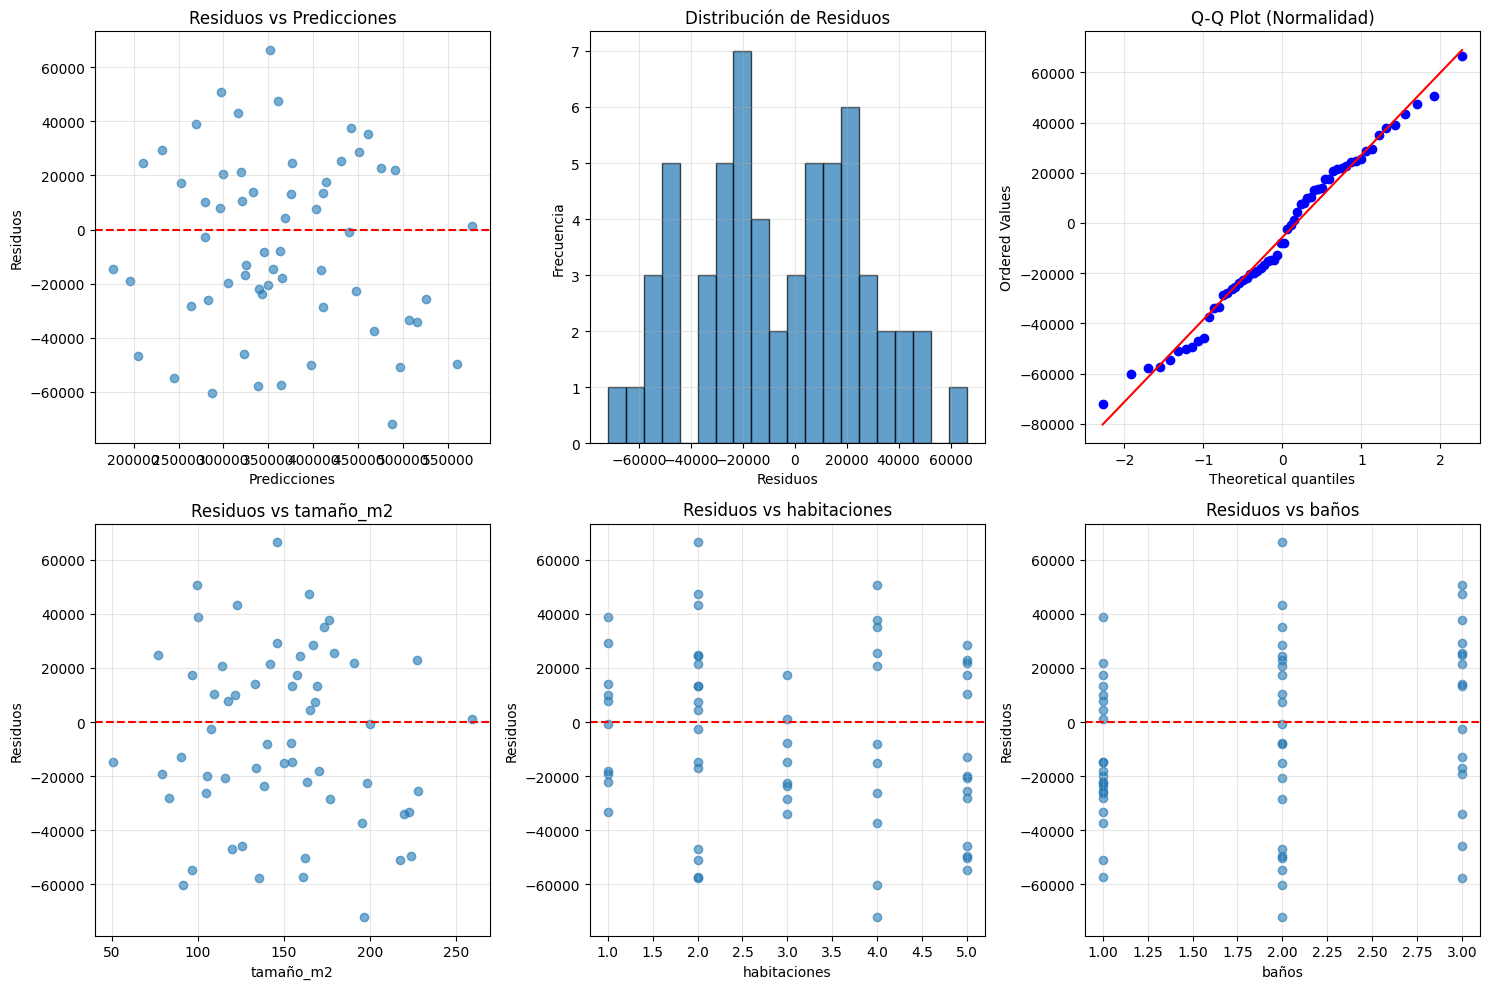

 DIAGNÓSTICO DE RESIDUOS:
• Media de residuos: $-5,708 (debería ser ~0)
• Desviación estándar: $32,279
• Residuo mínimo: $-72,017
• Residuo máximo: $66,352
• Test de normalidad (Shapiro): p = 0.4923
   Los residuos siguen distribución normal

6. CONSEJOS PRÁCTICOS
--------------------
   La regresión lineal asume relación lineal entre variables
   R² entre 0.7-1.0 indica modelo excelente
   R² entre 0.5-0.7 indica modelo bueno
   R² menor a 0.5 sugiere que el modelo necesita mejoras
   Siempre revisar residuos para validar supuestos
   Más variables no siempre significa mejor modelo
   Dividir datos es crucial para evaluar correctamente
   Interpretar coeficientes en contexto del problema

7. CUÁNDO USAR REGRESIÓN LINEAL
------------------------------

 IDEAL PARA:
  • Predecir precios (casas, autos, productos)
  • Estimar ventas basadas en publicidad
  • Predecir temperatura basada en factores climáticos
  • Calcular salarios basados en experiencia/educación
  • Relaciones aproximadam

In [ ]:
"""
T2: REGRESIÓN LINEAL SIMPLE Y MÚLTIPLE
Predicción de valores numéricos con modelos lineales
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("=== REGRESIÓN LINEAL: SIMPLE Y MÚLTIPLE ===\n")

print("1. ¿QUÉ ES LA REGRESIÓN LINEAL?")
print("-" * 30)

print("""
 OBJETIVO:
Predecir un valor numérico (variable dependiente) basándose en una o más
características (variables independientes).

 CONCEPTO MATEMÁTICO:
La regresión lineal busca la "mejor línea recta" que pase por los datos.
Esta línea se describe con la ecuación: y = mx + b

Donde:
• y = variable que queremos predecir (dependiente)
• x = variable que usamos para predecir (independiente)
• m = pendiente (cuánto cambia y cuando x cambia en 1)
• b = intercepto (valor de y cuando x = 0)

 EJEMPLO COTIDIANO:
Predecir el precio de una casa basándose en su tamaño:
• y = precio de la casa
• x = metros cuadrados
• La línea nos dice: "por cada metro cuadrado adicional,
  el precio aumenta $X pesos"

 TIPOS:
• Simple: Una sola variable independiente (x → y)
• Múltiple: Varias variables independientes (x1, x2, x3... → y)
""")

print("\n2. REGRESIÓN LINEAL SIMPLE - PASO A PASO")
print("-" * 40)

# Crear datos de ejemplo: precio de casas vs tamaño
np.random.seed(42)
n_houses = 100

# Generar datos realistas
house_sizes = np.random.normal(150, 50, n_houses)  # metros cuadrados
house_sizes = np.clip(house_sizes, 50, 300)

# Precio basado en tamaño + ruido
base_price = 50000  # precio base
price_per_sqm = 2000  # precio por metro cuadrado
noise = np.random.normal(0, 50000, n_houses)  # variabilidad
house_prices = base_price + price_per_sqm * house_sizes + noise
house_prices = np.clip(house_prices, 100000, 800000)

# Crear DataFrame
houses_df = pd.DataFrame({
    'tamaño_m2': house_sizes,
    'precio': house_prices
})

print("DATASET DE CASAS CREADO:")
print(f"• {len(houses_df)} casas")
print(f"• Tamaño promedio: {houses_df['tamaño_m2'].mean():.1f} m²")
print(f"• Precio promedio: ${houses_df['precio'].mean():,.0f}")

print("\nPrimeras 5 casas:")
print(houses_df.head())

# Visualizar los datos
plt.figure(figsize=(15, 10))

# Gráfico 1: Datos originales
plt.subplot(2, 3, 1)
plt.scatter(houses_df['tamaño_m2'], houses_df['precio'], alpha=0.6, color='blue')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio ($)')
plt.title('Datos Originales: Tamaño vs Precio')
plt.grid(True, alpha=0.3)

print("\n2.1 ENTRENAR EL MODELO")
print("-" * 25)

# Preparar datos para sklearn
X = houses_df[['tamaño_m2']]  # Variable independiente (debe ser 2D)
y = houses_df['precio']       # Variable dependiente

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {len(X_train)} casas")
print(f"Datos de prueba: {len(X_test)} casas")

# Crear y entrenar el modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

print(f"\n PARÁMETROS DEL MODELO:")
print(f"• Intercepto (b): ${model_simple.intercept_:,.0f}")
print(f"• Pendiente (m): ${model_simple.coef_[0]:,.0f} por m²")

print(f"\n INTERPRETACIÓN:")
print(f"• Una casa de 0 m² costaría ${model_simple.intercept_:,.0f} (intercepto)")
print(f"• Por cada m² adicional, el precio aumenta ${model_simple.coef_[0]:,.0f}")

# Hacer predicciones
y_pred_train = model_simple.predict(X_train)
y_pred_test = model_simple.predict(X_test)

# Gráfico 2: Modelo entrenado
plt.subplot(2, 3, 2)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Datos entrenamiento')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio ($)')
plt.title('Modelo Entrenado')
plt.legend()
plt.grid(True, alpha=0.3)

print("\n2.2 EVALUAR EL MODELO")
print("-" * 25)

# Calcular métricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f" MÉTRICAS EN DATOS DE PRUEBA:")
print(f"• MAE (Error Absoluto Medio): ${mae_test:,.0f}")
print(f"• RMSE (Raíz Error Cuadrático): ${rmse_test:,.0f}")
print(f"• R² (Coeficiente Determinación): {r2_test:.3f}")

print(f"\n INTERPRETACIÓN DE MÉTRICAS:")
print(f"• En promedio, nos equivocamos por ${mae_test:,.0f}")
print(f"• El modelo explica {r2_test:.1%} de la variabilidad en precios")
if r2_test > 0.7:
    print("• ¡Excelente! El modelo es muy bueno")
elif r2_test > 0.5:
    print("• Bueno. El modelo es aceptable")
else:
    print("• Regular. El modelo necesita mejoras")

# Gráfico 3: Predicciones vs Realidad
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'Predicciones vs Realidad\nR² = {r2_test:.3f}')
plt.grid(True, alpha=0.3)

print("\n3. REGRESIÓN LINEAL MÚLTIPLE")
print("-" * 30)

print("""
 CONCEPTO:
En lugar de usar solo una variable (tamaño), usamos múltiples variables
para hacer predicciones más precisas.

Ecuación: y = b + m1*x1 + m2*x2 + m3*x3 + ...

Donde cada variable tiene su propio coeficiente que indica
su importancia en la predicción.
""")

# Crear dataset más complejo con múltiples variables
np.random.seed(42)
n_houses_multi = 200

# Variables independientes
house_data_multi = {
    'tamaño_m2': np.random.normal(150, 50, n_houses_multi),
    'habitaciones': np.random.randint(1, 6, n_houses_multi),
    'baños': np.random.randint(1, 4, n_houses_multi),
    'edad_años': np.random.randint(0, 50, n_houses_multi),
    'distancia_centro_km': np.random.exponential(10, n_houses_multi)
}

# Limpiar datos
house_data_multi['tamaño_m2'] = np.clip(house_data_multi['tamaño_m2'], 50, 400)
house_data_multi['distancia_centro_km'] = np.clip(house_data_multi['distancia_centro_km'], 1, 50)

# Crear precio basado en múltiples factores
price_multi = (
    50000 +  # precio base
    2000 * house_data_multi['tamaño_m2'] +  # por m²
    15000 * house_data_multi['habitaciones'] +  # por habitación
    10000 * house_data_multi['baños'] +  # por baño
    -1000 * house_data_multi['edad_años'] +  # descuento por edad
    -2000 * house_data_multi['distancia_centro_km'] +  # descuento por distancia
    np.random.normal(0, 30000, n_houses_multi)  # ruido
)

house_data_multi['precio'] = np.clip(price_multi, 100000, 1000000)

# Crear DataFrame
houses_multi_df = pd.DataFrame(house_data_multi)

print("DATASET MÚLTIPLE CREADO:")
print(f"• {len(houses_multi_df)} casas")
print(f"• {len(houses_multi_df.columns)-1} variables predictoras")

print("\nEstadísticas descriptivas:")
print(houses_multi_df.describe().round(2))

# Matriz de correlación
correlation_matrix = houses_multi_df.corr()

plt.subplot(2, 3, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f')
plt.title('Correlaciones entre Variables')

print("\n3.1 ENTRENAR MODELO MÚLTIPLE")
print("-" * 30)

# Preparar datos
features = ['tamaño_m2', 'habitaciones', 'baños', 'edad_años', 'distancia_centro_km']
X_multi = houses_multi_df[features]
y_multi = houses_multi_df['precio']

# Dividir datos
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# Entrenar modelo
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

print(f" COEFICIENTES DEL MODELO MÚLTIPLE:")
print(f"• Intercepto: ${model_multi.intercept_:,.0f}")
for feature, coef in zip(features, model_multi.coef_):
    print(f"• {feature}: ${coef:,.0f}")

print(f"\n INTERPRETACIÓN:")
print(f"• Precio base: ${model_multi.intercept_:,.0f}")
for feature, coef in zip(features, model_multi.coef_):
    if coef > 0:
        print(f"• Cada unidad más de {feature} aumenta el precio en ${coef:,.0f}")
    else:
        print(f"• Cada unidad más de {feature} disminuye el precio en ${abs(coef):,.0f}")

# Hacer predicciones
y_pred_train_multi = model_multi.predict(X_train_multi)
y_pred_test_multi = model_multi.predict(X_test_multi)

# Evaluar modelo múltiple
mse_multi = mean_squared_error(y_test_multi, y_pred_test_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_test_multi)
r2_multi = r2_score(y_test_multi, y_pred_test_multi)

print(f"\n MÉTRICAS MODELO MÚLTIPLE:")
print(f"• MAE: ${mae_multi:,.0f}")
print(f"• RMSE: ${rmse_multi:,.0f}")
print(f"• R²: {r2_multi:.3f}")

# Gráfico 5: Comparación de modelos
plt.subplot(2, 3, 5)
plt.scatter(y_test_multi, y_pred_test_multi, alpha=0.6, label='Múltiple')
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()], 'r--', linewidth=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'Modelo Múltiple\nR² = {r2_multi:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

print("\n3.2 COMPARACIÓN DE MODELOS")
print("-" * 25)

# Comparar modelos en el mismo conjunto de datos
# Entrenar modelo simple en datos múltiples para comparación justa
model_simple_comp = LinearRegression()
model_simple_comp.fit(X_train_multi[['tamaño_m2']], y_train_multi)
y_pred_simple_comp = model_simple_comp.predict(X_test_multi[['tamaño_m2']])
r2_simple_comp = r2_score(y_test_multi, y_pred_simple_comp)

comparison_df = pd.DataFrame({
    'Modelo': ['Simple (solo tamaño)', 'Múltiple (5 variables)'],
    'R²': [r2_simple_comp, r2_multi],
    'MAE': [mean_absolute_error(y_test_multi, y_pred_simple_comp), mae_multi],
    'RMSE': [np.sqrt(mean_squared_error(y_test_multi, y_pred_simple_comp)), rmse_multi]
})

print("COMPARACIÓN DE MODELOS:")
print(comparison_df.round(3))

mejora_r2 = ((r2_multi - r2_simple_comp) / r2_simple_comp) * 100
print(f"\n MEJORA CON MODELO MÚLTIPLE:")
print(f"• R² mejoró en {mejora_r2:.1f}%")
print(f"• Ahora explicamos {r2_multi:.1%} vs {r2_simple_comp:.1%} de la variabilidad")

# Gráfico 6: Importancia de variables
plt.subplot(2, 3, 6)
feature_importance = pd.DataFrame({
    'Variable': features,
    'Coeficiente': model_multi.coef_
})
feature_importance['Importancia_Abs'] = abs(feature_importance['Coeficiente'])
feature_importance = feature_importance.sort_values('Importancia_Abs', ascending=True)

plt.barh(feature_importance['Variable'], feature_importance['Coeficiente'])
plt.xlabel('Coeficiente')
plt.title('Importancia de Variables\n(Impacto en Precio)')
plt.grid(True, alpha=0.3)

# Colorear barras según signo
colors = ['red' if x < 0 else 'green' for x in feature_importance['Coeficiente']]
plt.barh(feature_importance['Variable'], feature_importance['Coeficiente'], color=colors, alpha=0.7)

plt.tight_layout()
plt.show()

print("\n4. EJEMPLO PRÁCTICO: PREDICCIÓN DE NUEVAS CASAS")
print("-" * 45)

# Crear ejemplos de casas nuevas para predecir
nuevas_casas = pd.DataFrame({
    'tamaño_m2': [120, 200, 80, 300],
    'habitaciones': [2, 4, 1, 5],
    'baños': [1, 3, 1, 4],
    'edad_años': [5, 15, 30, 2],
    'distancia_centro_km': [8, 12, 25, 5]
})

print("CASAS NUEVAS PARA PREDECIR:")
print(nuevas_casas)

# Hacer predicciones
predicciones = model_multi.predict(nuevas_casas)

print(f"\n PREDICCIONES DE PRECIOS:")
for i, precio in enumerate(predicciones):
    print(f"Casa {i+1}: ${precio:,.0f}")

# Crear DataFrame con resultados
resultados_df = nuevas_casas.copy()
resultados_df['precio_predicho'] = predicciones

print(f"\nRESULTADOS COMPLETOS:")
print(resultados_df.round(0))

print("\n5. DIAGNÓSTICO DEL MODELO")
print("-" * 25)

# Análisis de residuos
residuos = y_test_multi - y_pred_test_multi

plt.figure(figsize=(15, 10))

# Gráfico 1: Residuos vs Predicciones
plt.subplot(2, 3, 1)
plt.scatter(y_pred_test_multi, residuos, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.grid(True, alpha=0.3)

# Gráfico 2: Distribución de residuos
plt.subplot(2, 3, 2)
plt.hist(residuos, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True, alpha=0.3)

# Gráfico 3: Q-Q plot (normalidad de residuos)
from scipy import stats
plt.subplot(2, 3, 3)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normalidad)')
plt.grid(True, alpha=0.3)

# Gráfico 4: Residuos vs cada variable
for i, feature in enumerate(features[:3]):  # Solo primeras 3 para espacio
    plt.subplot(2, 3, 4+i)
    plt.scatter(X_test_multi[feature], residuos, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.title(f'Residuos vs {feature}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" DIAGNÓSTICO DE RESIDUOS:")
print(f"• Media de residuos: ${residuos.mean():,.0f} (debería ser ~0)")
print(f"• Desviación estándar: ${residuos.std():,.0f}")
print(f"• Residuo mínimo: ${residuos.min():,.0f}")
print(f"• Residuo máximo: ${residuos.max():,.0f}")

# Test de normalidad
from scipy.stats import shapiro
stat, p_value = shapiro(residuos)
print(f"• Test de normalidad (Shapiro): p = {p_value:.4f}")
if p_value > 0.05:
    print("   Los residuos siguen distribución normal")
else:
    print("   Los residuos NO siguen distribución normal")

print("\n6. CONSEJOS PRÁCTICOS")
print("-" * 20)

tips = [
    " La regresión lineal asume relación lineal entre variables",
    " R² entre 0.7-1.0 indica modelo excelente",
    " R² entre 0.5-0.7 indica modelo bueno",
    " R² menor a 0.5 sugiere que el modelo necesita mejoras",
    " Siempre revisar residuos para validar supuestos",
    " Más variables no siempre significa mejor modelo",
    " Dividir datos es crucial para evaluar correctamente",
    " Interpretar coeficientes en contexto del problema"
]

for tip in tips:
    print(f"  {tip}")

print("\n7. CUÁNDO USAR REGRESIÓN LINEAL")
print("-" * 30)

use_cases = {
    " IDEAL PARA:": [
        "Predecir precios (casas, autos, productos)",
        "Estimar ventas basadas en publicidad",
        "Predecir temperatura basada en factores climáticos",
        "Calcular salarios basados en experiencia/educación",
        "Relaciones aproximadamente lineales"
    ],
    " NO IDEAL PARA:": [
        "Relaciones muy no lineales",
        "Datos con muchos outliers extremos",
        "Variables categóricas como objetivo",
        "Relaciones muy complejas",
        "Datos con patrones temporales complejos"
    ]
}

for category, cases in use_cases.items():
    print(f"\n{category}")
    for case in cases:
        print(f"  • {case}")

print("\n" + "="*50)
print("¡REGRESIÓN LINEAL COMPLETADA!")
print("="*50)

print(f"\n RESUMEN DE LO APRENDIDO:")
summary_points = [
    f"✓ Regresión simple: 1 variable → R² = {r2_simple_comp:.3f}",
    f"✓ Regresión múltiple: 5 variables → R² = {r2_multi:.3f}",
    f"✓ Mejora del {mejora_r2:.1f}% usando más variables",
    "✓ Interpretación de coeficientes",
    "✓ Evaluación con métricas (MAE, RMSE, R²)",
    "✓ Diagnóstico de residuos",
    "✓ Predicción de nuevos casos"
]

for point in summary_points:
    print(f"  {point}")

# Guardar modelos y datos para siguientes scripts
import joblib
joblib.dump(model_multi, 'modelo_regresion_multiple.pkl')
houses_multi_df.to_csv('datos_casas_multiple.csv', index=False)

print(f"\n ARCHIVOS GUARDADOS:")
print("• modelo_regresion_multiple.pkl")
print("• datos_casas_multiple.csv")
print("\nEstos archivos se usarán en ejercicios posteriores.")